# Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np

%matplotlib inline

In [5]:
dataset = pd.read_csv('Position_Salaries.csv')

# Dataset

* First let’s look at the dataset. It is Position_Salaries.csv.

* It has 3 columns — “Position”, “Level” and “Salary” and describes the approximate salary range for an employee based on what level he falls under.

* For example if an employee is a Manager — he falls in Level 4 and should get around $80,000.

In [6]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


# Load the Dataset

**If we look at the dataset, we need to predict the salary for an employee who falls under Level for example 6.5 — So we really do not need the first column “Position”.**

* Here X is the independent variable which is the “Level” and y is the dependent variable which is the “Salary”

### So for X, we specify

***X = dataset.iloc[:, 1:2].values
which simply means take all rows and all columns from index 1 upto index 2 but not including index 2 (upper bound range is not included)***

### And for y, we specify

***dataset.iloc[:, 2].values
which simply means take all rows and only columns with index 2 — In python indexes begin at 0 — so index 2 here is the second column which is Salary.***


In [7]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

# Fit Decision Tree Regressor

**We will be using the DecisionTreeRegressor class from the library sklearn.tree. First we create an object of the DecisionTreeRegressor class and pass criterion parameter as “mse” (Mean Squared Error) and then call the fit method passing the X and y.**

In [8]:
regressor = DecisionTreeRegressor(criterion='mse')

In [9]:
regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

# Visualize

**Let’s plot the graph to look at the results for Decision Tree Regression. For Decision Trees we have to use continuous points.**

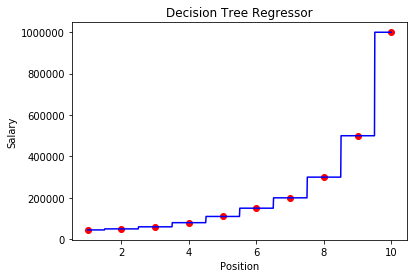

In [10]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid),1))

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title('Decision Tree Regressor')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

# Make Prediction

**So now let us see for a person falling in Different Position Level — what salary does a Decision Tree regression predict.**

In [14]:
y_pred = regressor.predict([[6.5]])
print('The predicted salary of a person at 6.5 Level is ',y_pred)

The predicted salary of a person at 6.5 Level is  [150000.]


In [15]:
y_pred = regressor.predict([[7.9]])
print('The predicted salary of a person at 7.9 Level is ',y_pred)

The predicted salary of a person at 7.9 Level is  [300000.]


In [16]:
def Salary_Prediction(level):
    y_pred = regressor.predict([[level]])
    print('The predicted salary of a person at {} Level is '.format(level),y_pred)

In [17]:
Salary_Prediction(1)

The predicted salary of a person at 1 Level is  [45000.]


In [18]:
Salary_Prediction(3.8)

The predicted salary of a person at 3.8 Level is  [80000.]


# The End!